In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import scipy
import pandas as pd
import cv2
from tqdm import tqdm
import csv
import pickle
%matplotlib inline

In [3]:
df = pd.read_csv("labels.csv")
names = set(df["NAME"])
name_to_class = {j:i for i, j in enumerate(names)}
id_to_class = {i[0]:name_to_class[i[1]] for i in np.asarray(df)}

In [4]:
df.head()

,ID,NAME,CLASS,NEURON
0,2,LauralesLauraceaeCinnamomumcamphora,34,27
1,9,FagalesFagaceaeQuercusglauca,33,26
2,23,FagalesFagaceaeQuercusglauca,33,26
3,29,RosalesCannabaceaeCeltissinensis,29,-1
4,92,LamialesOleaceaeOsmanthus x fortunei,49,-1


In [5]:
df["CLASS"] = df["ID"].apply(lambda i: id_to_class[i])

## Distribution of class

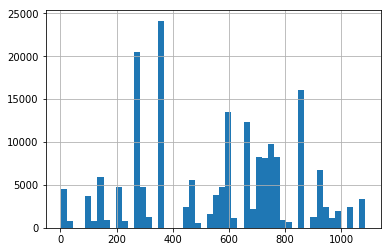

In [4]:
df = pd.read_csv("file-all.lst", header=None, delimiter=" ")
df[1].hist(bins=50)

## Top-N class

In [5]:
df[1].value_counts().sort_values(ascending=False)

359     16584
852     13852
655     12382
601     10292
277      9148
265      7886
460      5554
361      5405
136      5341
717      4550
725      4036
755      3609
295      3475
915      3202
109      2957
577      2929
545      2831
198      2802
747      2787
713      2664
590      2597
441      2457
774      2451
1030     2430
729      2365
2        2313
694      2248
363      2144
274      2014
763      1986
        ...  
23       1126
959      1096
551      1047
9        1028
863       973
160       958
762       943
797       876
539       844
610       790
991       781
707       779
238       777
29        765
268       762
131       757
542       713
269       712
92        692
817       664
592       633
485       559
145       542
937       522
935       319
626       299
703       283
583       271
293       120
851        13
Name: 1, Length: 77, dtype: int64

## Extract top-N classes

In [19]:
THRESHOLD = 2000
N_TRAIN = int(THRESHOLD * 0.7)

df = pd.read_csv("file-all.lst", header=None, delimiter=" ")
df_train = pd.DataFrame()
df_test = pd.DataFrame()
count = 0
for i in range(max(df[1])+1):
    if len(df[(df[1]==i)&(df[1]!=713)&(df[1]!=747)]) >= THRESHOLD:
        count += 1
        df_sample = df[df[1]==i].sample(n=THRESHOLD)
        df_train = df_train.append(df_sample[:N_TRAIN], ignore_index=True)
        df_test = df_test.append(df_sample[N_TRAIN:], ignore_index=True)
print("total{} classes".format(count))

total27 classes


## Save

In [20]:
df_train.to_csv("train-c{}.lst".format(count), index=False, header=False)
df_test.to_csv("test-c{}.lst".format(count), index=False, header=False)

In [22]:
df = pd.read_csv("labels.csv")
tr = pd.read_csv("train-c{}.lst".format(count), header=None)
labels = set(tr[1])
dict_class_neuron = {j:i for i,j in enumerate(labels)}
f = lambda x: dict_class_neuron[x] if x in labels else -1
df = df.drop("NEURON", axis=1)
df["NEURON"] = df["CLASS"].apply(f)

with open("dict_class_neuron.pkl", 'wb') as f:
     pickle.dump(dict_class_neuron, f)

In [2]:
df = pd.read_csv("labels.csv")
df.head()

,ID,NAME,CLASS
0,2,LauralesLauraceaeCinnamomumcamphora,34
1,9,FagalesFagaceaeQuercusglauca,33
2,23,FagalesFagaceaeQuercusglauca,33
3,29,RosalesCannabaceaeCeltissinensis,29
4,92,LamialesOleaceaeOsmanthus x fortunei,49


In [23]:
df.to_csv("labels.csv", index=False)